# 필요한 라이브러리 설치

In [32]:
from sklearn.manifold import TSNE
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import warnings
import sklearn
import missingno as msno
from sklearn.manifold import LocallyLinearEmbedding
import math
warnings.filterwarnings('ignore')

# Data 불러오기

In [33]:
Simple_df =pd.read_csv("Sdf_6label.csv")
KNN_df=pd.read_csv("Kdf_6label.csv")
MICE_df=pd.read_csv("Mdf_6label.csv")

# 2차원 시각화 함수

In [34]:
def two_dimension_visual_plot(tsne_df,origin_df,imputer):
    
    tsne_df['bankruptcy'] = origin_df['bankruptcy'] 
 
    tsne_df_0_ab = tsne_df[tsne_df['bankruptcy'] == 0]
    tsne_df_1_ab = tsne_df[tsne_df['bankruptcy'] == 1]
    tsne_df_2_ab = tsne_df[tsne_df['bankruptcy'] == 2]
    tsne_df_3_ab = tsne_df[tsne_df['bankruptcy'] == 3]
    tsne_df_4_ab = tsne_df[tsne_df['bankruptcy'] == 4]
    tsne_df_5_ab = tsne_df[tsne_df['bankruptcy'] == 5]
    
    # target 별 시각화
    plt.scatter(tsne_df_0_ab['component 0'], tsne_df_0_ab['component 1'], color = 'green', label = 'NO BANKRuptcy')
    plt.scatter(tsne_df_1_ab['component 0'], tsne_df_1_ab['component 1'], color = 'red', label = 'AF 1 year B')
    plt.scatter(tsne_df_2_ab['component 0'], tsne_df_2_ab['component 1'], color = 'pink', label = 'AF 2 year B')
    plt.scatter(tsne_df_3_ab['component 0'], tsne_df_3_ab['component 1'], color = 'yellow', label = 'AF 3 year B')
    plt.scatter(tsne_df_4_ab['component 0'], tsne_df_4_ab['component 1'], color = 'orange', label = 'AF 4 year B')
    plt.scatter(tsne_df_5_ab['component 0'], tsne_df_5_ab['component 1'], color = 'blue', label = 'AF 5 year B')
    
    STR = imputer+"imputer"
    plt.title(STR)
    plt.xlabel('component 0')
    plt.ylabel('component 1')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

# 3차원 시각화 함수

In [35]:
def three_dimension_visual_plot(tsne_df3,origin_df,imputer):

    # 3차원 그래프 세팅
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111, projection='3d')
        # class target 정보 불러오기 
    tsne_df3['bankruptcy'] =origin_df['bankruptcy']

    tsne_df_0_no = tsne_df3[tsne_df3['bankruptcy'] == 0]
    tsne_df_1_ab = tsne_df3[tsne_df3['bankruptcy'] == 1]
    tsne_df_2_ab = tsne_df3[tsne_df3['bankruptcy'] == 2]
    tsne_df_3_ab = tsne_df3[tsne_df3['bankruptcy'] == 3]
    tsne_df_4_ab = tsne_df3[tsne_df3['bankruptcy'] == 4]
    tsne_df_5_ab = tsne_df3[tsne_df3['bankruptcy'] == 5]


        # target 별 시각화
    ax.scatter(tsne_df_0_no['component 0'], tsne_df_0_no['component 1'], tsne_df_0_no['component 2'], color = 'green', label = 'NO BANKRuptcy') 
    ax.scatter(tsne_df_1_ab['component 0'], tsne_df_1_ab['component 1'], tsne_df_1_ab['component 2'], color = 'red', label =  'AF 1 year B')
    ax.scatter(tsne_df_2_ab['component 0'], tsne_df_2_ab['component 1'], tsne_df_2_ab['component 2'], color = 'pink', label = 'AF 2 year B')
    ax.scatter(tsne_df_3_ab['component 0'], tsne_df_3_ab['component 1'], tsne_df_3_ab['component 2'], color = 'yellow', label = 'AF 3 year B')
    ax.scatter(tsne_df_4_ab['component 0'], tsne_df_4_ab['component 1'], tsne_df_4_ab['component 2'], color = 'orange', label = 'AF 4 year B')
    ax.scatter(tsne_df_5_ab['component 0'], tsne_df_5_ab['component 1'], tsne_df_5_ab['component 2'], color = 'blue', label = 'AF 5 year B')

    
    STR = imputer+"imputer"
    plt.title(STR)
    ax.set_xlabel('component 0')
    ax.set_ylabel('component 1')
    ax.set_zlabel('component 2')
    ax.legend(bbox_to_anchor=(1,1))
    plt.show()

In [36]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [37]:
def two_dimension_remove_index(df):
    df_index1 = outliers_iqr(df['component 0'])[0]  # p1에 대한 이상치
    df_index2 = outliers_iqr(df['component 1'])[0]  # p2에 대한 이상치

    outli_pca2 = np.concatenate([TSNE3_index1,TSNE3_index2])
    outli_pca2 = np.unique(outli_pca2)
    
    df_y = My.drop(outli_pca2, axis=0)
    df_y = My.reset_index(drop=True)
    df = df.drop(outli_pca2, axis=0)
    df = df.reset_index(drop=True)  
    return df

def three_dimension_remove_index(df):
    df_index1 = outliers_iqr(df['component 0'])[0]  # p1에 대한 이상치
    df_index2 = outliers_iqr(df['component 1'])[0]  # p2에 대한 이상치
    df_index3 = outliers_iqr(df['component 2'])[0]  # p2에 대한 이상치
    
    outli_pca2 = np.concatenate([TSNE3_index1,TSNE3_index2,TSNE3_index3])
    outli_pca2 = np.unique(outli_pca2)
    df_y = My.drop(outli_pca2, axis=0)
    df_y = My.reset_index(drop=True)
    df = df.drop(outli_pca2, axis=0)
    df = df.reset_index(drop=True)  
    return df


# KNN TSNE  
    3class

In [14]:
Kdf =KNN_df
Kdata = Kdf.drop(['bankruptcy'], axis=1).mul(100) #50,000
Ky =Kdf["bankruptcy"]
n_components2 = 2 # 2차원으로 차원 축소
KNN_model_2 = TSNE(n_components=n_components2,n_iter = 2000)
n_components3 = 3 # 2차원으로 차원 축소
KNN_model_3 = TSNE(n_components=n_components3,n_iter = 2000)

#2차원 축소 모델 트레이닝
KNN_TSNE_np2= KNN_model_2.fit_transform(Kdata)
# numpy array -> DataFrame 변환
KNN_tsne_df2 = pd.DataFrame(KNN_TSNE_np2, columns = ['component 0', 'component 1'])

#3차원 축소 모델 트레이닝
KNN_TSNE_np3=KNN_model_3.fit_transform(Kdata)
# numpy array -> DataFrame 변환
KNN_tsne_df3 = pd.DataFrame(KNN_TSNE_np3, columns = ['component 0', 'component 1','component 2'])

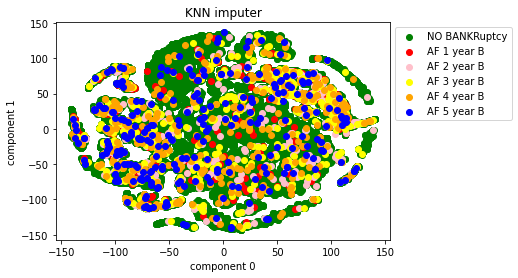

In [15]:
two_dimension_visual_plot(KNN_tsne_df2,KNN_df,"KNN ")

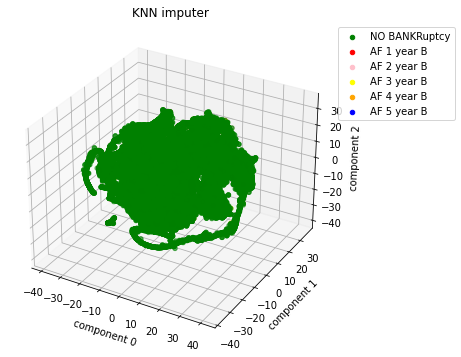

In [16]:
three_dimension_visual_plot(KNN_tsne_df3,KNN_df,"KNN ")

# MICE TSNE  
6class

In [17]:
Mdf= MICE_df
Mdata = MICE_df.drop(['bankruptcy'], axis=1)
My = Mdf["bankruptcy"]
MICE_model_2 = TSNE(n_components=2)
MICE_model_3 = TSNE(n_components=3)

#2차원 축소 모델 트레이닝
MICE_TSNE_np2=MICE_model_2.fit_transform(Mdata)
# numpy array -> DataFrame 변환
MICE_tsne_df2 = pd.DataFrame(MICE_TSNE_np2, columns = ['component 0', 'component 1'])

#3차원 축소 모델 트레이닝
MICE_TSNE_np3=MICE_model_3.fit_transform(Mdata)
# numpy array -> DataFrame 변환
MICE_tsne_df3 = pd.DataFrame(MICE_TSNE_np3, columns = ['component 0', 'component 1','component 2'])

# 이상치 제거

In [ ]:
#MICE_tsne_df2=two_dimension_remove_index(MICE_tsne_df2)

# 시각화

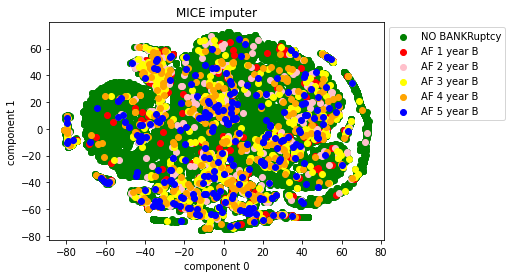

In [18]:
two_dimension_visual_plot(MICE_tsne_df2,MICE_df,"MICE ")

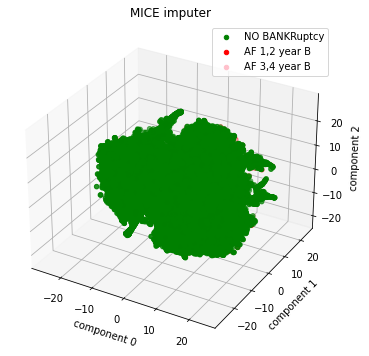

In [15]:
three_dimension_visual_plot(MICE_tsne_df3,MICE_df,"MICE ")

# SIMPLE IMPUTATER TSNE  
6class

In [19]:
Sdf =Simple_df
Sdata = Sdf.drop(['bankruptcy'], axis=1)
Sy = Sdf["bankruptcy"]
simple_model_2 = TSNE(n_components=n_components2,n_iter = 2000)
simple_model_3 = TSNE(n_components=n_components3,n_iter = 2000)

#2차원 축소 모델 트레이닝
S_TSNE_np2=simple_model_2.fit_transform(Sdata)
# numpy array -> DataFrame 변환
S_tsne_df2 = pd.DataFrame(S_TSNE_np2, columns = ['component 0', 'component 1'])

#3차원 축소 모델 트레이닝
S_TSNE_np3=simple_model_3.fit_transform(Sdata)
# numpy array -> DataFrame 변환
S_tsne_df3 = pd.DataFrame(S_TSNE_np3, columns = ['component 0', 'component 1','component 2'])

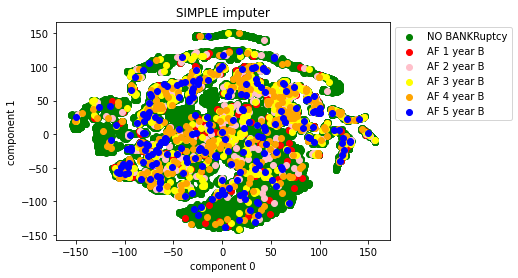

In [20]:
two_dimension_visual_plot(S_tsne_df2,Simple_df,"SIMPLE ")

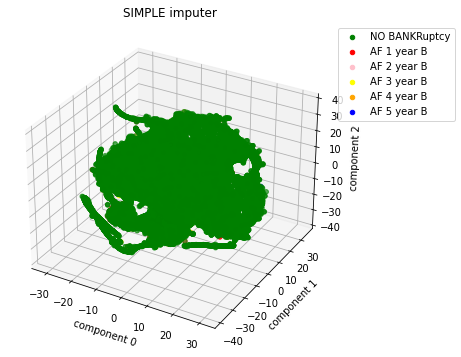

In [21]:
three_dimension_visual_plot(S_tsne_df3,Simple_df,"SIMPLE ")

# LLE

In [38]:
embedding_LLE = LocallyLinearEmbedding(n_components=2)
X_transformed_LLE = embedding_LLE.fit_transform(Mdata)

In [39]:
LLE_df2 = pd.DataFrame(X_transformed_LLE, columns = ['component 0', 'component 1'])

In [40]:
LLE2_index1 = outliers_iqr(LLE_df2['component 0'])[0]  # p1에 대한 이상치
LLE2_index2 = outliers_iqr(LLE_df2['component 1'])[0]  # p2에 대한 이상치
outli_pca2 = np.concatenate([LLE2_index1,LLE2_index2])
outli_pca2 = np.unique(outli_pca2)
LLE2_y = My.drop(outli_pca2, axis=0)
LLE2_y = My.reset_index(drop=True)
LLE_df2 = LLE_df2.drop(outli_pca2, axis=0)
LLE_df2 = LLE_df2.reset_index(drop=True)

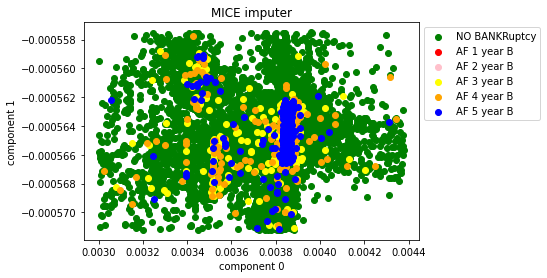

In [41]:
two_dimension_visual_plot(LLE_df2 ,Mdf,"MICE ")